# ライブラリのインポート

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from scipy import signal
plt.rcParams["font.family"] = "MS Gothic"
plt.rcParams["font.size"] = 20

# 任意の製品のeq_oneディレクトリ

In [2]:
# グラフAのeq_detaパス
a_path = r"C:\Users\user\Desktop\05_グライディングセンタ\eq_data\1製品ごと\2217395-000\20221110_1249 2217395-000-009.csv"
# グラフBのeq_detaパス
b_path = r"C:\Users\user\Desktop\05_グライディングセンタ\eq_data\1製品ごと\2300002-000\20230207_1815 2300002-000-022.csv"
# グラフCのeq_detaパス
c_path = r"C:\Users\user\Desktop\05_グライディングセンタ\eq_data\1製品ごと\2300002-000\20230207_2256 2300002-000-036.csv"

# ドレ前 = '36'# 誤差値＋大(負荷大きい)
# ドレ後 = '22'# 誤差値－大(負荷小さい)
# 中間 = '29'# 誤差値ほぼ０
print('読み込みました')

読み込みました


# eq_one読み込み

In [3]:
# 読み込み～加工
da = pd.read_csv(a_path,encoding="cp932")
db = pd.read_csv(b_path,encoding="cp932")
dc = pd.read_csv(c_path,encoding="cp932")

step = 1
da_selected = da.loc[::step]
db_selected = db.loc[::step]
dc_selected = dc.loc[::step]

print('処理完了')

print('グラフAのデータフレームの大きさは')
print(da_selected.shape)
print('グラフBのデータフレームの大きさは')
print(db_selected.shape)
print('グラフCのデータフレームの大きさは')
print(dc_selected.shape)

処理完了
グラフAのデータフレームの大きさは
(83800, 7)
グラフBのデータフレームの大きさは
(83000, 7)
グラフCのデータフレームの大きさは
(82600, 7)


# フーリエ変換

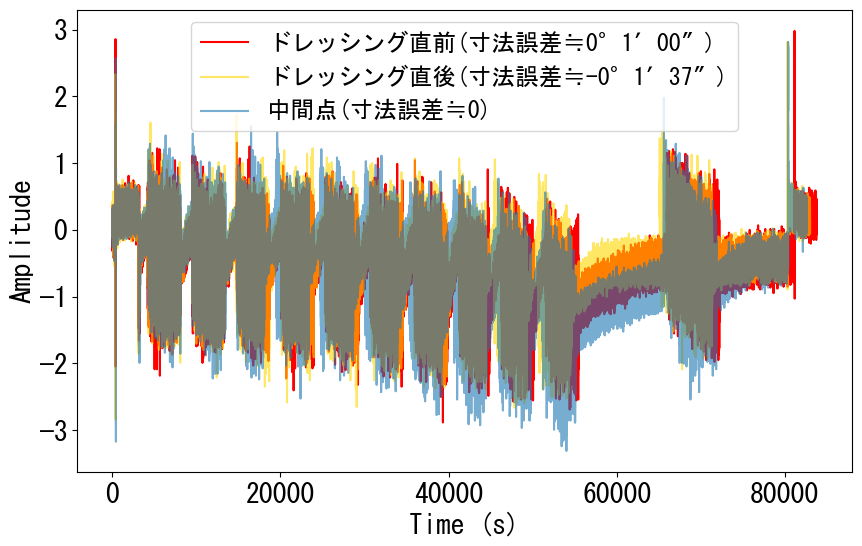

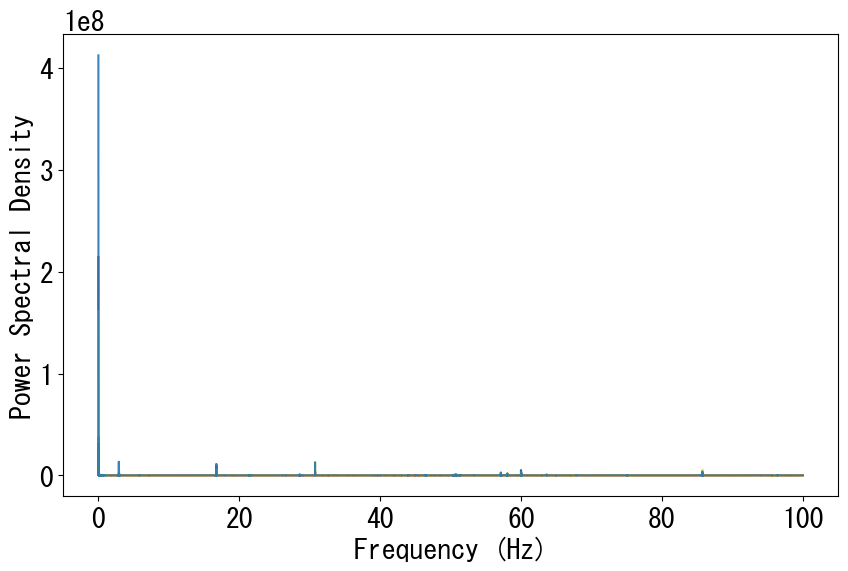

In [17]:
# データの生成
a_data = da_selected["X軸_TCMD(%)"].tolist()
b_data = db_selected["X軸_TCMD(%)"].tolist()
c_data = dc_selected["X軸_TCMD(%)"].tolist()

# データのプロット
plt.figure(figsize=(10,6))
plt.plot(a_data,color='red')
plt.plot(b_data, alpha=0.6,color='gold')
plt.plot(c_data, alpha=0.6)
plt.legend(["ドレッシング直前(寸法誤差≒0°1′00″)","ドレッシング直後(寸法誤差≒-0°1′37″)",'中間点(寸法誤差≒0)'], fontsize=17, loc=0)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# フーリエ変換
plt.figure(figsize=(10,6))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')

fft_a_data = np.fft.fft(a_data)
freq_a_data = np.fft.fftfreq(len(a_data), d=1/200)

fft_b_data = np.fft.fft(b_data)
freq_b_data = np.fft.fftfreq(len(b_data), d=1/200)

fft_c_data = np.fft.fft(c_data)
freq_c_data = np.fft.fftfreq(len(c_data), d=1/200)

# パワースペクトル密度のプロット
plt.plot(freq_a_data[1:len(a_data)//2], np.abs(fft_a_data[1:len(a_data)//2])**2, alpha=1,color='red')
plt.plot(freq_b_data[1:len(b_data)//2], np.abs(fft_b_data[1:len(b_data)//2])**2, alpha=0.9,color='gold')
plt.plot(freq_c_data[1:len(c_data)//2], np.abs(fft_c_data[1:len(c_data)//2])**2, alpha=0.9)
# plt.xlim(16.74,16.78)
# plt.ylim(0,30000000)
plt.show()

# 逆フーリエ変換(基本は０～２㎐を取り出す。Z軸のみ16.8㎐付近も取り出す。)

In [6]:
# a_dataフィルター処理
filtered_fft_a_data = np.zeros(len(fft_a_data), dtype=np.complex64)
for i in range(len(freq_a_data)):
    if (freq_a_data[i] > 0 and freq_a_data[i] < 2):
        filtered_fft_a_data[i] = fft_a_data[i]

# a_dataフーリエ逆変換
filtered_a_data = np.fft.ifft(filtered_fft_a_data)



# b_dataフィルター処理
filtered_fft_b_data = np.zeros(len(fft_b_data), dtype=np.complex64)
for i in range(len(freq_b_data)):
    if (freq_b_data[i] > 0 and freq_b_data[i] < 2):
        filtered_fft_b_data[i] = fft_b_data[i]

# b_dataフーリエ逆変換
filtered_b_data = np.fft.ifft(filtered_fft_b_data)



# c_dataフィルター処理
filtered_fft_c_data = np.zeros(len(fft_c_data), dtype=np.complex64)
for i in range(len(freq_c_data)):
    if (freq_c_data[i] > 0 and freq_c_data[i] < 2):
        filtered_fft_c_data[i] = fft_c_data[i]

# c_dataフーリエ逆変換
filtered_c_data = np.fft.ifft(filtered_fft_c_data)

# グラフ化

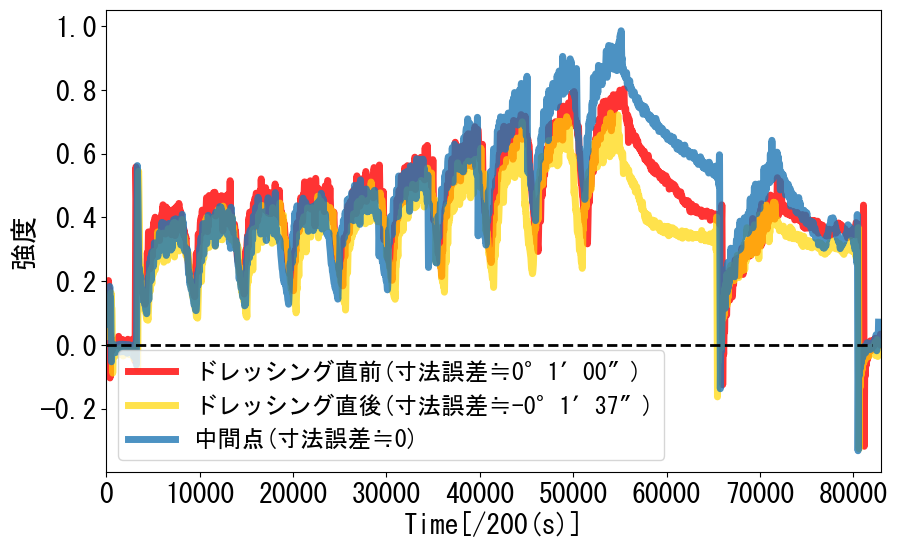

In [7]:
# フィルター処理を行った結果のグラフのプロット
plt.figure(figsize=(10,6))
plt.xlabel("Time[/200(s)]")
plt.ylabel("強度")

#X軸の場合はｙ値を反転[(-1)をかける。]させる。
#比較しやすいように、xとyを調整して始点を揃える必要がある。
xa = np.linspace(1,len(a_data),len(a_data))
plt.plot(xa, -(filtered_a_data.real)+0.42,color='red',alpha=0.8,linewidth=5)

xb = np.linspace(1,len(b_data),len(b_data))
plt.plot(xb+300, -(filtered_b_data.real)+0.35,alpha=0.7,color='gold',linewidth=5)

xc = np.linspace(1,len(c_data),len(c_data))
plt.plot(xc+100, -(filtered_c_data.real)+0.45,alpha=0.8,linewidth=5)

#凡例
plt.legend(["ドレッシング直前(寸法誤差≒0°1′00″)","ドレッシング直後(寸法誤差≒-0°1′37″)",'中間点(寸法誤差≒0)'], fontsize=17, loc=3)
plt.hlines(0, 0, 82000, colors='black', linestyle='dashed', linewidth=2)
plt.xlim(0,83000)
# plt.ylim(-0.3,1.0)
plt.show()